# ChartsJS Data

In [1]:
import re
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pickle

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [81]:
def create_linechart_json(x, labels):
    """
    
    """
    data = {
        'labels': labels,
        'datasets': [
            {
                'label': "My First dataset",
                'fill': False,
                'lineTension': 0.1,
                'backgroundColor': "rgba(75,192,192,0.4)",
                'borderColor': "rgba(75,192,192,1)",
                'borderCapStyle': 'butt',
                'borderDash': [],
                'borderDashOffset': 0.0,
                'borderJoinStyle': 'miter',
                'pointBorderColor': "rgba(75,192,192,1)",
                'pointBackgroundColor': "#fff",
                'pointBorderWidth': 1,
                'pointHoverRadius': 5,
                'pointHoverBackgroundColor': "rgba(75,192,192,1)",
                'pointHoverBorderColor': "rgba(220,220,220,1)",
                'pointHoverBorderWidth': 2,
                'pointRadius': 1,
                'pointHitRadius': 10,
                'data': x,
                'spanGaps': False,
            }
        ]
    }
    return data

def create_barchart_json(labels, data, background_colors, border_colors):
    """
    Parameters should be arrays. Example of color formats:
    backgroundColor: [
        'rgba(255, 99, 132, 0.2)',
        'rgba(54, 162, 235, 0.2)',
        'rgba(255, 206, 86, 0.2)',
        'rgba(75, 192, 192, 0.2)',
        'rgba(153, 102, 255, 0.2)',
        'rgba(255, 159, 64, 0.2)'
    ],
    borderColor: [
        'rgba(255,99,132,1)',
        'rgba(54, 162, 235, 1)',
        'rgba(255, 206, 86, 1)',
        'rgba(75, 192, 192, 1)',
        'rgba(153, 102, 255, 1)',
        'rgba(255, 159, 64, 1)'
    ],
    """
    data = {
        'labels': labels,
        'datasets': [
            {
                'label': "My First dataset",
                'backgroundColor': background_colors,
                'borderColor': border_colors,
                'borderWidth': 1,
                'data': data,
            }
        ]
    }
    return data

def create_piechart_json(labels, data, background_color, hover_background_color):
    """
    All parameters should be arrays of equal length. 
    backgroundColor: [
        "#FF6384",
        "#36A2EB",
        "#FFCE56"
    ],
    hoverBackgroundColor: [
        "#FF6384",
        "#36A2EB",
        "#FFCE56"
    ]
    """
    data = {
        'labels': labels,
        'datasets': [
            {
                'data': data,
                'backgroundColor': background_color,
                'hoverBackgroundColor': hover_background_color
            }
        ]
    }
    return data

def create_bubble_json(x, y, r, background_color, hover_background_color):
    """
    
    """
    xyr = []
    for i, item in x.enumerate:
        bubble = {}
        bubble["x"] = x[i]
        bubble["y"] = y[i]
        bubble["r"] = r[i]
    xyr.append(bubble)
    data = {
        'datasets': [
            {
                'label': label,
                'data': xyr,
                'backgroundColor': background_color,
                'hoverBackgroundColor': hover_background_color,
            }
        ]
    };
    

In [69]:
# create_barchart_json([1,2,3], ['one','two','three'])
create_barchart_json([1,2,3], ['one','two','three'])

{'datasets': [{'backgroundColor': 'rgba(75,192,192,0.4)',
   'borderCapStyle': 'butt',
   'borderColor': 'rgba(75,192,192,1)',
   'borderDash': [],
   'borderDashOffset': 0.0,
   'borderJoinStyle': 'miter',
   'data': [1, 2, 3],
   'fill': False,
   'label': 'My First dataset',
   'lineTension': 0.1,
   'pointBackgroundColor': '#fff',
   'pointBorderColor': 'rgba(75,192,192,1)',
   'pointBorderWidth': 1,
   'pointHitRadius': 10,
   'pointHoverBackgroundColor': 'rgba(75,192,192,1)',
   'pointHoverBorderColor': 'rgba(220,220,220,1)',
   'pointHoverBorderWidth': 2,
   'pointHoverRadius': 5,
   'pointRadius': 1,
   'spanGaps': False}],
 'labels': ['one', 'two', 'three']}

In [72]:
create_barchart_json(['one','two','three'], [1,2,3])

{'datasets': [{'backgroundColor': ['rgba(255, 99, 132, 0.2)',
    'rgba(54, 162, 235, 0.2)',
    'rgba(255, 206, 86, 0.2)',
    'rgba(75, 192, 192, 0.2)',
    'rgba(153, 102, 255, 0.2)',
    'rgba(255, 159, 64, 0.2)'],
   'borderColor': ['rgba(255,99,132,1)',
    'rgba(54, 162, 235, 1)',
    'rgba(255, 206, 86, 1)',
    'rgba(75, 192, 192, 1)',
    'rgba(153, 102, 255, 1)',
    'rgba(255, 159, 64, 1)'],
   'borderWidth': 1,
   'data': [1, 2, 3],
   'label': 'My First dataset'}],
 'labels': ['one', 'two', 'three']}

In [76]:
create_piechart_json(['one','two','three'], [1,2,3], ["#FF6384","#36A2EB","#FFCE56"], ["#FF6384","#36A2EB","#FFCE56"])

{'datasets': [{'backgroundColor': ['#FF6384', '#36A2EB', '#FFCE56'],
   'data': [1, 2, 3],
   'hoverBackgroundColor': ['#FF6384', '#36A2EB', '#FFCE56']}],
 'labels': ['one', 'two', 'three']}

In [82]:
create_bubble_json([1,2,3],[1,2,3], [10,20,30], "#FF6384", "#FF6384")

AttributeError: 'list' object has no attribute 'enumerate'

In [2]:
# Import cleaned ELSI public school data

with open('../data/processed/0215_all_features_cleaned.pkl', 'rb') as picklefile: 
    public_school_df = pickle.load(picklefile)`a
print(public_school_df.shape)
public_school_df.head()

(1368, 51)


,district,college_readiness,school_name_x,city_x,state_x,graduation_rate,school_id,state_name,agency_id,county_name,...,hawaiian_nat_pacific_isl_students,two_or_more_races_students,male_students,female_students,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,pct_hispanic,total_students_calc
0,Bay,40.9,A. Crawford Mosley High School,Lynn Haven,FL,82.0,120009000067,Florida,1200090,BAY COUNTY,...,2,64,844,843,0.346177,0.085359,0.808536,0.087730,0.046829,1687
1,Harford County Public Schools,28.6,Aberdeen High,Aberdeen,MD,87.0,240039000679,Maryland,2400390,HARFORD COUNTY,...,6,130,779,665,0.354571,0.086565,0.427978,0.348338,0.081025,1444
2,Abington Heights SD,35.1,Abington Heights High School,Clarks Summit,PA,93.0,420201005091,Pennsylvania,4202010,LACKAWANNA COUNTY,...,0,7,542,492,0.102515,0.020309,0.907157,0.018375,0.020309,1034
3,Abington SD,33.0,Abington High School,Abington,PA,93.0,420204003241,Pennsylvania,4202040,MONTGOMERY COUNTY,...,3,32,920,823,0.154332,0.023523,0.647160,0.232358,0.055077,1743
4,San Jose Unified School District,47.1,Abraham Lincoln High,San Jose,CA,94.0,"=""063459005696""",California,"=""0634590""",SANTA CLARA COUNTY,...,7,32,899,952,0.438142,0.097245,0.154511,0.041059,0.717450,1851


In [3]:
public_school_df['state_county_name'] = public_school_df['county_name'] + " (" + public_school_df['state_x'] + ")"
public_school_df['state_county_name'] = public_school_df['state_county_name'].apply(lambda x: x.lower())

In [4]:
public_school_df['pct_asian'] = public_school_df['asian_or_asian_pacif_isl_students'] / public_school_df['total_students_calc']

In [5]:
pctasn = public_school_df['pct_asian'].mean()
public_school_df['pct_asian'].fillna(value=pctasn, inplace=True)

In [23]:
for index, row in public_school_df.iterrows():
    if 'Suburb' in row['urban_centric_locale']:
        public_school_df.loc[index, 'urban_centric_locale'] = "Suburb"
    elif 'City' in row['urban_centric_locale']:
        public_school_df.loc[index, 'urban_centric_locale'] = "City"
    elif 'Town' in row['urban_centric_locale']:
        public_school_df.loc[index,'urban_centric_locale'] = "Town"
    else:
        public_school_df.loc[index, 'urban_centric_locale'] = "Rural"

In [6]:
public_school_df['total_students_calc'] = pd.qcut(public_school_df['total_students_calc'], 5, labels=["small","small_medium","medium", "medium_large", "large"])

In [42]:
# classify_college_readiness = lambda x : 1 if x > 36.1 else 0

# public_school_df['college_readiness'] = public_school_df['college_readiness'].apply(classify_college_readiness)

# public_school_df['college_readiness'].value_counts()

0    685
1    683
Name: college_readiness, dtype: int64

In [8]:
# Import cleaned county data

with open('../data/processed/0219_county_data_cleaned.pkl', 'rb') as picklefile: 
    county_df = pickle.load(picklefile)
print(county_df.shape)
county_df.head()

(3195, 6)


,Year,county_id,state_county_name,pct_all_ages_in_poverty,pct_under_18_in_poverty,median_hh_income
0,2015.0,0.0,united states,14.7,20.7,55775.0
1,2015.0,1000.0,alabama,18.5,26.5,44833.0
2,2015.0,1001.0,autauga county (al),12.7,18.8,56580.0
3,2015.0,1003.0,baldwin county (al),12.9,19.6,52387.0
4,2015.0,1005.0,barbour county (al),32.0,45.2,31433.0


### Join public school and county data

In [9]:
join_df = pd.merge(public_school_df, county_df, how='left', on=['state_county_name'])

In [10]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 1367
Data columns (total 58 columns):
district                                 1368 non-null object
college_readiness                        1368 non-null float64
school_name_x                            1368 non-null object
city_x                                   1368 non-null object
state_x                                  1368 non-null object
graduation_rate                          1365 non-null float64
school_id                                1368 non-null object
state_name                               1368 non-null object
agency_id                                1368 non-null object
county_name                              1368 non-null object
fips_state_code                          1368 non-null object
charter_school                           1308 non-null object
magnet_school                            1265 non-null object
shared_time_school                       1368 non-null object
urban_centric_locale   

### Visualizations

In [15]:
viz_cols =  ['school_name_x',\
           'state_x',\
           'college_readiness',\
           'pupil_teacher_ratio',\
           'pct_eligible_for_free_lunch',\
           'median_hh_income',\
           'pct_white',\
           'pct_black',\
           'pct_hispanic',\
           'pct_asian',\
           'urban_centric_locale',\
           'total_students_calc']

In [16]:
viz_df = join_df[viz_cols].dropna()
viz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1367
Data columns (total 12 columns):
school_name_x                  1308 non-null object
state_x                        1308 non-null object
college_readiness              1308 non-null float64
pupil_teacher_ratio            1308 non-null float64
pct_eligible_for_free_lunch    1308 non-null float64
median_hh_income               1308 non-null float64
pct_white                      1308 non-null float64
pct_black                      1308 non-null float64
pct_hispanic                   1308 non-null float64
pct_asian                      1308 non-null float64
urban_centric_locale           1308 non-null object
total_students_calc            1308 non-null object
dtypes: float64(8), object(4)
memory usage: 132.8+ KB


In [17]:
mn_viz_df = viz_df[viz_df['state_x'] == 'MN']

In [18]:
mn_viz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 59 to 1366
Data columns (total 12 columns):
school_name_x                  35 non-null object
state_x                        35 non-null object
college_readiness              35 non-null float64
pupil_teacher_ratio            35 non-null float64
pct_eligible_for_free_lunch    35 non-null float64
median_hh_income               35 non-null float64
pct_white                      35 non-null float64
pct_black                      35 non-null float64
pct_hispanic                   35 non-null float64
pct_asian                      35 non-null float64
urban_centric_locale           35 non-null object
total_students_calc            35 non-null object
dtypes: float64(8), object(4)
memory usage: 3.6+ KB


In [22]:
mn_viz_df[['median_hh_income','college_readiness','urban_centric_locale','total_students_calc']].sort_values('urban_centric_locale').to_json('mn_viz.json', orient='records')

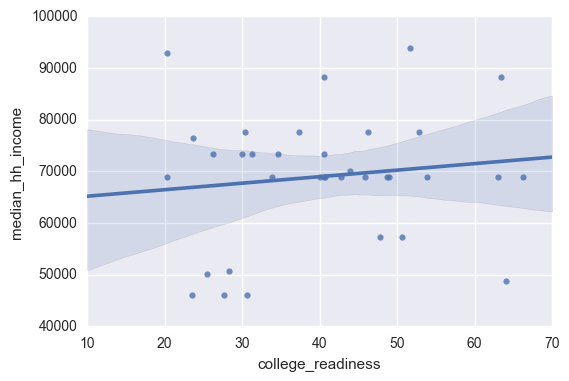

In [37]:
ax = sns.regplot(x="college_readiness", y="median_hh_income", data=mn_viz_df)

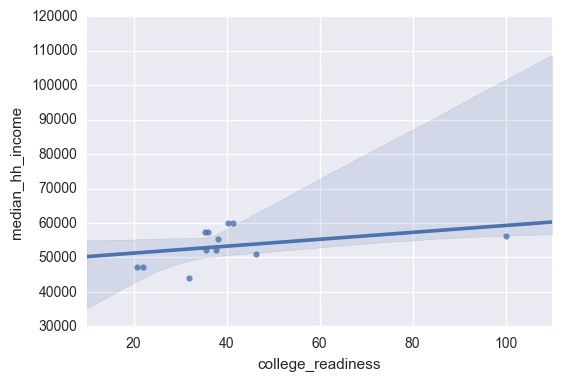

In [24]:
ax = sns.regplot(x="college_readiness", y="median_hh_income", data=join_df[join_df['state_x']=='SC'])

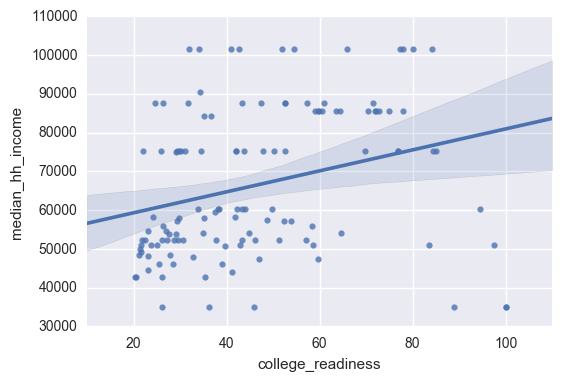

In [25]:
ax = sns.regplot(x="college_readiness", y="median_hh_income", data=join_df[join_df['state_x']=='NY'])

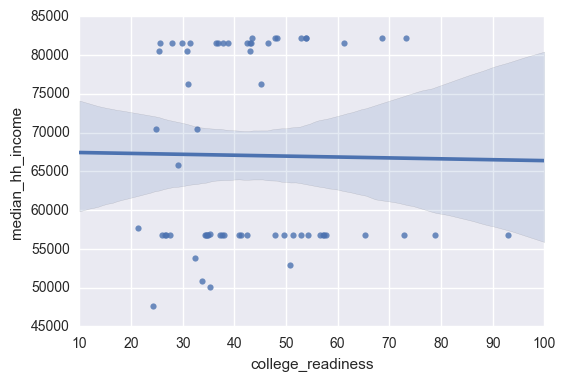

In [43]:
ax = sns.regplot(x="college_readiness", y="median_hh_income", data=join_df[join_df['state_x']=='IL'])

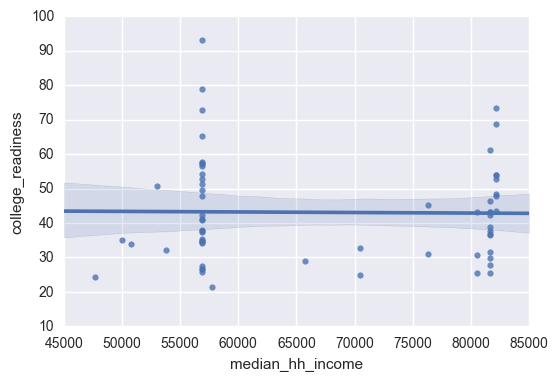

In [42]:
ax = sns.regplot(x="median_hh_income", y="college_readiness", data=join_df[join_df['state_x']=='IL'])

In [45]:
join_df[join_df['state_x']=='IL']

,district,college_readiness,school_name_x,city_x,state_x,graduation_rate,school_id,state_name,agency_id,county_name,...,pct_black,pct_hispanic,total_students_calc,state_county_name,pct_asian,Year,county_id,pct_all_ages_in_poverty,pct_under_18_in_poverty,median_hh_income
21,Dupage Hsd 88,36.9,Addison Trail High School,Addison,IL,91.0,171394001737,Illinois,1713940,DUPAGE COUNTY,...,0.034551,0.589339,large,dupage county (il),0.042448,2015.0,17043.0,7.1,9.2,81616.0
22,Adlai E Stevenson Hsd 125,73.3,Adlai E Stevenson High School,Lincolnshire,IL,93.0,173258003385,Illinois,1732580,LAKE COUNTY,...,0.018234,0.071112,large,lake county (il),0.222714,2015.0,17097.0,9.0,12.3,82160.0
107,Barrington CUSD 220,47.8,Barrington High School,Barrington,IL,95.0,170505000188,Illinois,1705050,LAKE COUNTY,...,0.007583,0.021801,medium,lake county (il),0.048341,2015.0,17097.0,9.0,12.3,82160.0
183,Chicago Public Schools,52.8,Brooks College Prep Academy High School,Chicago,IL,95.0,170993002031,Illinois,1709930,COOK COUNTY,...,0.835878,0.142494,small_medium,cook county (il),0.001272,2015.0,17031.0,16.2,23.5,56841.0
189,Township Hsd 214,54.3,Buffalo Grove High School,Buffalo Grove,IL,92.0,170417000110,Illinois,1704170,COOK COUNTY,...,0.015798,0.234860,medium_large,cook county (il),0.086361,2015.0,17031.0,16.2,23.5,56841.0
229,Community High School District 155,43.1,Cary-Grove Community High School,Cary,IL,97.0,171137001366,Illinois,1711370,MCHENRY COUNTY,...,0.006101,0.089296,medium_large,mchenry county (il),0.024404,2015.0,17111.0,8.1,10.7,80513.0
269,Chicago Public Schools,34.7,Chicago High School for the Arts,Chicago,IL,88.0,170993006058,Illinois,1709930,COOK COUNTY,...,0.541667,0.241319,small_medium,cook county (il),0.020833,2015.0,17031.0,16.2,23.5,56841.0
301,Community High School District 99,37.7,Comm High School Dist. 99 - North High School,Downers Grove,IL,95.0,171257001518,Illinois,1712570,DUPAGE COUNTY,...,0.052802,0.110699,large,dupage county (il),0.056508,2015.0,17043.0,7.1,9.2,81616.0
352,Chicago Public Schools,42.4,DeVry Advantage Academy High School,Chicago,IL,100.0,170993005790,Illinois,1709930,COOK COUNTY,...,0.326531,0.530612,small,cook county (il),0.045918,2015.0,17031.0,16.2,23.5,56841.0
357,Twp Hsd 113,68.6,Deerfield High School,Deerfield,IL,98.0,171908002193,Illinois,1719080,LAKE COUNTY,...,0.005604,0.042341,medium_large,lake county (il),0.032379,2015.0,17097.0,9.0,12.3,82160.0
